<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Analysing_DataSet/AnalysingDataSet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scatter Charts
Let's get started to visualize the dataset.

We have new  dataset. Attributes of this dataset:

* price: dolar cinsiden fiyat
* carat: ağırlık
* cut: kalite (fair,good, very good, premium, ideal)
* color: renk (from J(worst)to D(best) )
* clarity: temizliği, berraklığı (I1(worst), SI2,SI1,VS2,VS1,VVS2,VVS1,1F(best))
* x: length in mm (0-10.74)
* y: width in mm (0- 58.9)
* z: depth in mm (0-31.8)
* depth: toplam derinlik yüzdesii = z/mean(x,y) =2*z/(x+y)(43-79)
* table: elmasın en geniş noktasına göre genişliği (43-95)


In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
 df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
#to define ordinality
from pandas.api.types import CategoricalDtype

In [8]:
 cut_kategriler = ["Fair","Good","Very Good","Premium","Ideal"]
 df["cut"] = df.cut.astype(CategoricalDtype(categories=cut_kategriler,ordered=True))
 df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

### BarPlot

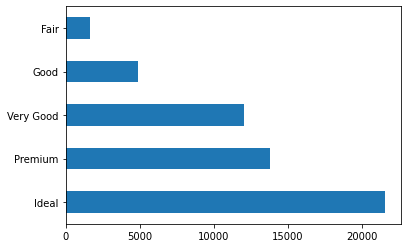

In [9]:
df["cut"].value_counts().plot.barh();

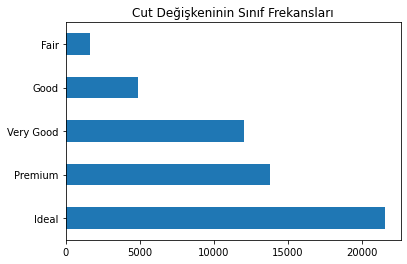

In [10]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

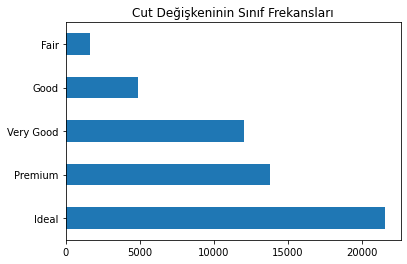

In [11]:
#yana doğru uzadıkça 2 parantez arasına alırsan okunabilirliği artımış olursun.
(df["cut"].value_counts()
          .plot.barh()
          .set_title("Cut Değişkeninin Sınıf Frekansları"));

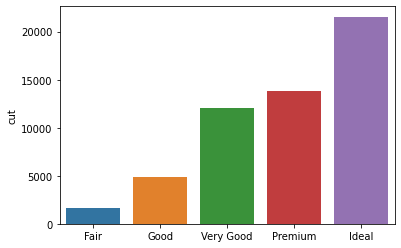

In [12]:
sns.barplot(x= df.cut.value_counts().index, y = df.cut.value_counts(), data = df);

### Crosover

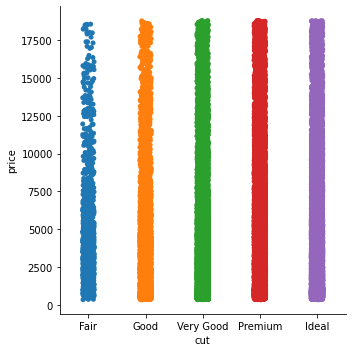

In [13]:
sns.catplot(x = "cut", y = "price", data = df)

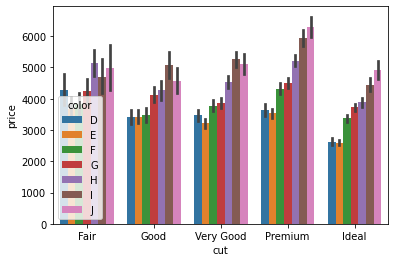

In [14]:
sns.barplot(x = "cut", y = "price", hue= "color", data = df);

In [15]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### histogram and density graph(histogram ve yoğunluk graiği)

In [16]:
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Distplot'ta hem histogram hem yoğunluk fonksiyonu bastırabiliriz. kde = yoğunluk, hist = histogram. Elde etmek istedğin dağılım grafiği türüne göre ikisinide kullanabilirsin ya da birini false yapar diğerini kullanırsın, duruma göre ayarlarsın. Başta her ikiside default true gelir

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


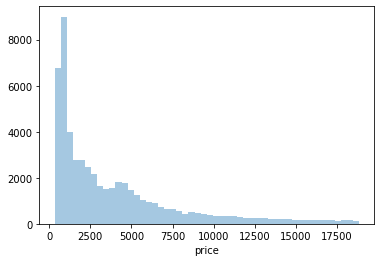

In [17]:
sns.distplot(df.price, kde = False); # a function to show distribution, bize elemanların frekanslarını döndürür

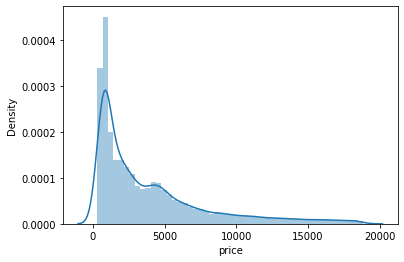

In [18]:
sns.distplot(df.price);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


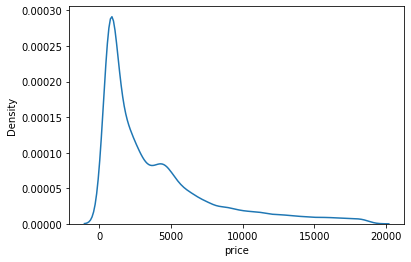

In [19]:
sns.distplot(df.price, hist=False);

In [20]:
?sns.distplot

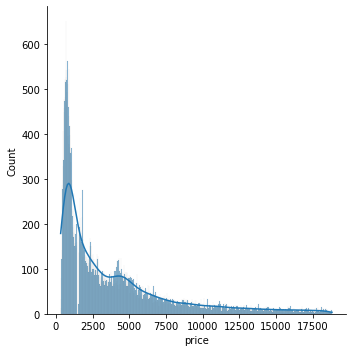

In [21]:
sns.displot(df.price,kde=True,bins=1000)

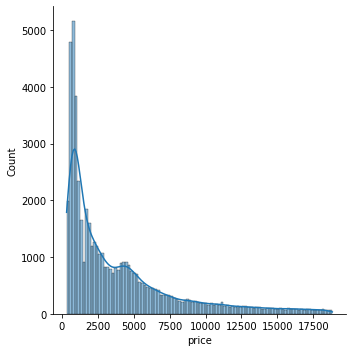

In [22]:
sns.displot(df.price,kde=True,bins=100)

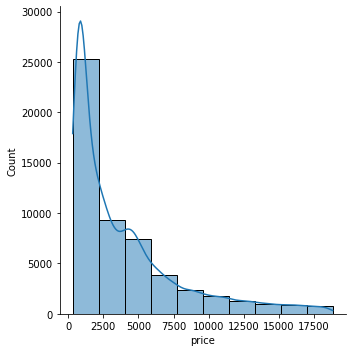

In [23]:
sns.displot(df.price,kde=True,bins=10)

Bins'in mantığı, x eksenindeki aralıklara, verdiğin değer kadar sütun sıkıştırarak temsil edilen sütun sayısını arttırmasıdır.

In [24]:
df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

### Crossover For Hist and Denisty Graphs

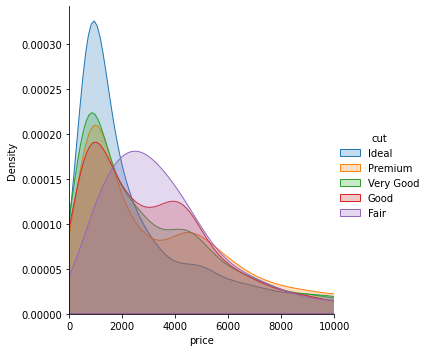

In [25]:
(sns
 .FacetGrid(
    df,
    hue="cut",
    height=5,
    xlim=(0,10_000)
    )
 .map(sns.kdeplot, "price",shade=True)
 .add_legend()      ## cut ınıflarının/levellerinin değerlerini verir.
);

Yukarıdaki grafiğin özeti, elmasların kalites sınıflarının/levellerin parasal değerlerine göre dağılım grafiği. <br>
FacetGrid Methodu, koşullu ilikileri birden birden fazla grafikte çizmek için kullanılır. Aynı zamanda, içerisindeki map fonksiyonu sayesinde bir boyut daha katabiliyor ve bu sayede çok boyutlu grafik çizebiliyotuz. Bu methodu seabornun kendi sayfasındanda mutlaka araştır

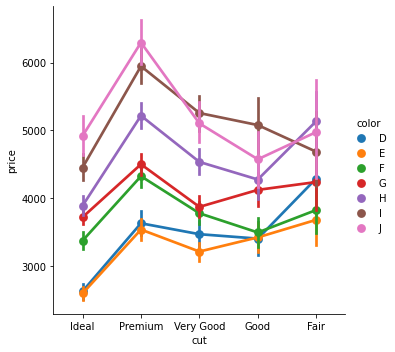

In [26]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df)
# kind tür belirlemek için kullanlıyordu. Seaborn sitesinden girip kontrol et başka güzl özelliklerde var
# point, grafiği nokta nokta çıkartmayı sağlar.
# add_legend kullanmadık, zaten kendisi vermiş çünkü. Dikkat et hue değişkeni için
# veri seti yanlış tasarlanmış, doğrusu: ideal< good < very good < fair < premium

Yukarıdaki grafiğe dikkatli bak, burada hem cut değişkeninin color'ın levellerine göre aldığı fiyat değişimlerini gözlemleyebilirsin hem de cut'ın levellerine göre de bir önceki leveldeki cut'ın bir sonraki leveldeki cut'ın color'ına göre kıyaslayabilirsin. İşte catplotta 3 boyutu bu şekilde bir arada yorumlayabiliriz.

Biz burada değişkenler arasında bir ilişki bulmaya çalıştık. Makine öğrenmesi algoritmaları da tam olarak bunun için var, değişkenler arası ilişkileri bulup eğitilir ve sonraki test değerleriyle test edilir... Devamını biliyorsun sen ;)